In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.spatial.distance import cdist

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [2]:
data_zoo=pd.read_csv("zoo.csv")
class_data=pd.read_csv("class.csv")

In [3]:
data_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data_zoo.shape

(101, 18)

In [5]:
data_zoo.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [6]:
data_zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


### Q2. Drop animal_name 


In [7]:
data_zoo_numerical_only=data_zoo.drop("animal_name", axis=1)
data_zoo_numerical_only.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Q3 Check distribution of target variable

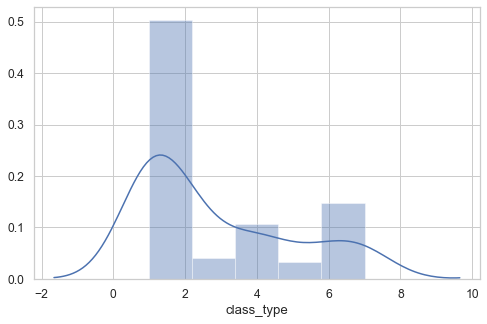

In [8]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.distplot(data_zoo_numerical_only['class_type'])

In [9]:
# Join zoo table and class table to show actual class names
df_original=pd.merge(data_zoo,class_data,how='left',left_on='class_type',right_on='Class_Number')
df_original.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


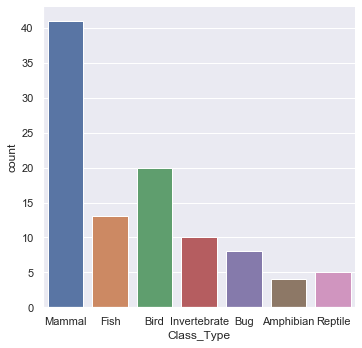

In [10]:
# Checking which class the most zoo animals belong to
sns.set(rc={'figure.figsize':(10,5)})

sns.catplot(x = 'Class_Type', data = df_original, kind = 'count')


In [11]:
print("Skewness in the distribution= ", data_zoo_numerical_only['class_type'].skew())

if data_zoo_numerical_only['class_type'].skew() < 1 and data_zoo_numerical_only['class_type'].skew() > -1:
    print("The distribution is moderately skewed")
else:
    if data_zoo_numerical_only['class_type'].skew() >1 or data_zoo_numerical_only['class_type'].skew() <1:
        print("The distribution is highly skewed")
    


Skewness in the distribution=  0.8523619056338327
The distribution is moderately skewed


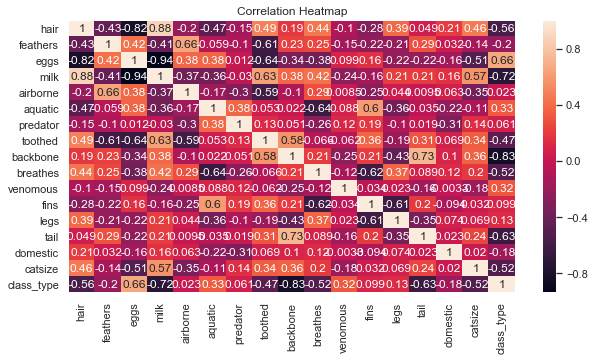

In [12]:
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = data_zoo_numerical_only.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Q4. Check for missing values

In [13]:
data_zoo_numerical_only.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

### Q5. Import class file and understand the data

In [14]:
class_data=pd.read_csv("class.csv")
class_data.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [15]:
class_data.shape

(7, 4)

In [16]:
missing_value=class_data.isna().sum()
print(missing_value)

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64


In [17]:
class_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Number,7.0,4.000000,2.160247,1.0,2.5,4.0,5.5,7.0
Number_Of_Animal_Species_In_Class,7.0,14.428571,12.895182,4.0,6.5,10.0,16.5,41.0


In [18]:
# Join zoo table and class table to show actual class names
original_data_df=pd.merge(data_zoo,class_data,how='left',left_on='class_type',right_on='Class_Number')
original_data_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


##### Distribution of Class_Number column

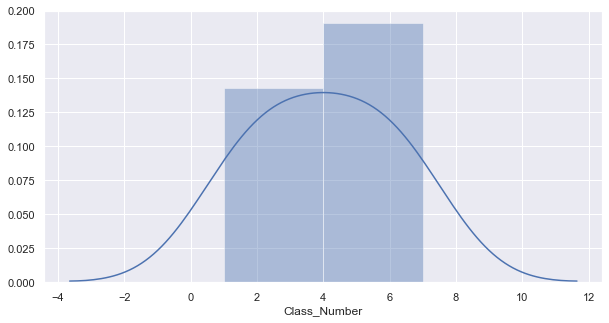

In [19]:
#distribution of Class_Number column
sns.distplot(class_data['Class_Number'])
plt.show()

In [20]:
#checking skewness in the Class Number column
print("Skewness of the class Number column is =", class_data["Class_Number"].skew())

if class_data['Class_Number'].skew() ==0:
    print("The distribution is normally distributed")
elif class_data['Class_Number'].skew() < 1 and class_data['Class_Number'].skew() > -1:
    print("The distribution is moderately skewed")
elif class_data['Class_Number'].skew() >1 or class_data['Class_Number'].skew() <1:
        print("The distribution is highly skewed")    

Skewness of the class Number column is = 0.0
The distribution is normally distributed


##### Distribution of Number_Of_Animal_Species_In_Class column

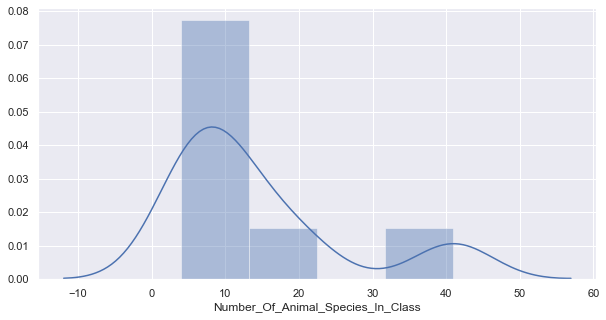

In [21]:
sns.distplot(class_data['Number_Of_Animal_Species_In_Class'])

In [22]:
#checking skewness in the Class Number column
print("Skewness of the Number_Of_Animal_Species_In_Class column is =", class_data['Number_Of_Animal_Species_In_Class'].skew())

if class_data['Number_Of_Animal_Species_In_Class'].skew() < 1 and class_data['Number_Of_Animal_Species_In_Class'].skew() > -1:
    print("The distribution is moderately skewed")
else:
    if class_data['Number_Of_Animal_Species_In_Class'].skew() >1 or class_data['Number_Of_Animal_Species_In_Class'].skew() <1:
        print("The distribution is highly skewed")
    

Skewness of the Number_Of_Animal_Species_In_Class column is = 1.806969693514074
The distribution is highly skewed


### Q6. Standardize the data 

In [23]:
from scipy.stats import zscore

In [24]:
data_zoo_numerical_only=data_zoo_numerical_only.apply(zscore)
data_zoo_numerical_only.head().T


,0,1,2,3,4
hair,1.161395,1.161395,-0.861034,1.161395,1.161395
feathers,-0.496904,-0.496904,-0.496904,-0.496904,-0.496904
eggs,-1.185227,-1.185227,0.843721,-1.185227,-1.185227
milk,1.209717,1.209717,-0.826640,1.209717,1.209717
airborne,-0.558291,-0.558291,-0.558291,-0.558291,-0.558291
aquatic,-0.744208,-0.744208,1.343710,-0.744208,-0.744208
predator,0.896421,-1.115547,0.896421,0.896421,0.896421
toothed,0.809776,0.809776,0.809776,0.809776,0.809776
backbone,0.465690,0.465690,0.465690,0.465690,0.465690
breathes,0.512348,0.512348,-1.951800,0.512348,0.512348


### Q7. Find out the linkage matrix

In [25]:
linkage(data_zoo_numerical_only, metric='euclidean')

array([[  0.        ,   3.        ,   0.        ,   2.        ],
       [  4.        ,  10.        ,   0.        ,   2.        ],
       [ 44.        , 102.        ,   0.        ,   3.        ],
       [ 45.        , 103.        ,   0.        ,   4.        ],
       [ 47.        , 104.        ,   0.        ,   5.        ],
       [ 50.        , 105.        ,   0.        ,   6.        ],
       [ 64.        , 106.        ,   0.        ,   7.        ],
       [ 67.        , 107.        ,   0.        ,   8.        ],
       [ 69.        , 108.        ,   0.        ,   9.        ],
       [ 98.        , 109.        ,   0.        ,  10.        ],
       [  1.        ,   5.        ,   0.        ,   2.        ],
       [ 17.        , 111.        ,   0.        ,   3.        ],
       [ 22.        , 112.        ,   0.        ,   4.        ],
       [ 28.        , 113.        ,   0.        ,   5.        ],
       [ 55.        , 114.        ,   0.        ,   6.        ],
       [ 36.        ,  94

### Q8. Plot the dendrogram.

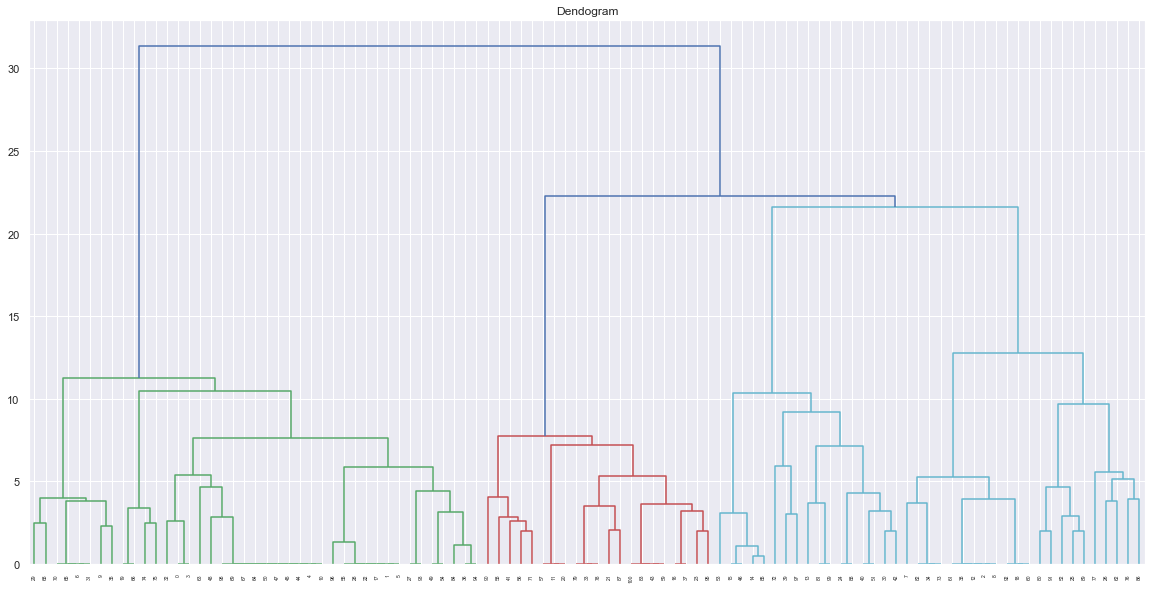

In [26]:
fig = plt.figure(figsize=(20, 10))
plt.title("Dendogram")
dn = dendrogram(linkage(data_zoo_numerical_only, metric='euclidean', method='ward'))
plt.show()

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

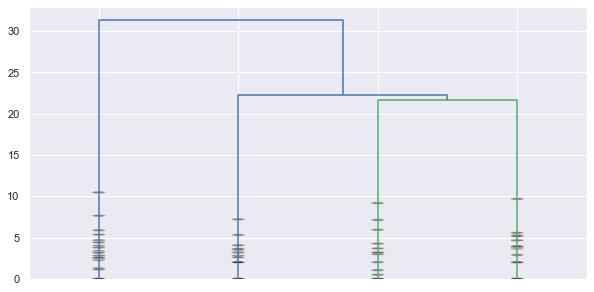

In [27]:
dendrogram(
    linkage(data_zoo_numerical_only, metric='euclidean', method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    show_leaf_counts=False,
    show_contracted=True  # to get a distribution impression in truncated branches
)
plt.show()

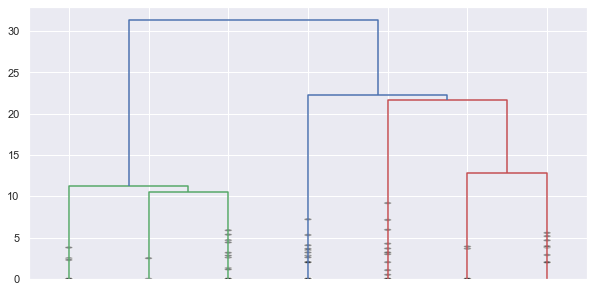

In [28]:
dendrogram(
    linkage(data_zoo_numerical_only, metric='euclidean', method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

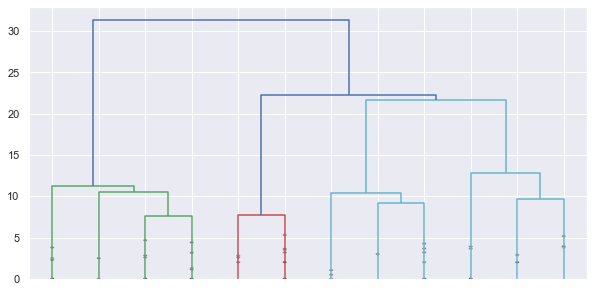

In [29]:
dendrogram(
    linkage(data_zoo_numerical_only, metric='euclidean', method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

In [33]:
##First approach will be using Kmean elbow plot to check the optimal value of K. I have used K-Means and then Agglomerative simultaneously

#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])
cluster_range=range(1,11)
for k in cluster_range:
    km=KMeans(n_clusters=k, n_init=10, max_iter=300)
    km.fit(data_zoo_numerical_only)
    sse_df.loc[sse_df.shape[0]]=[k,km.inertia_]
    #prediction=km.predict(data_zoo_numerical_only)
    #mean_Distortion.append(sum(np.min(cdist(data_zoo_numerical_only, km.cluster_centers_, 'euclidean'), axis=1))/ data_zoo_numerical_only.shape[0])



Text(0.5, 1.0, 'Selecting k with the elbow method')

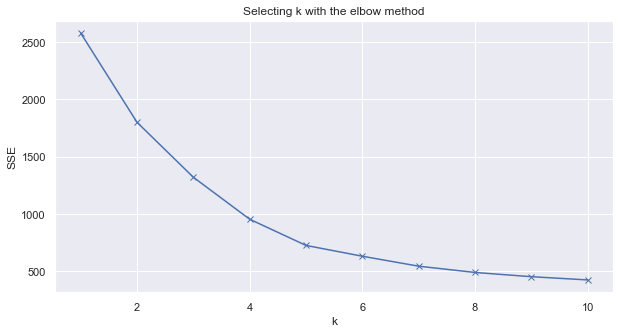

In [35]:
plt.plot(cluster_range, sse_df.SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Selecting k with the elbow method')

###### After K=7, SSE is drastically decresing. Thus optimal value of K = 7

In [31]:
km=KMeans(n_clusters=7)
km.fit(data_zoo_numerical_only)
data_zoo_numerical_only['k_8']=km.predict(data_zoo_numerical_only)
data_zoo_numerical_only.head().T

,0,1,2,3,4
hair,1.161395,1.161395,-0.861034,1.161395,1.161395
feathers,-0.496904,-0.496904,-0.496904,-0.496904,-0.496904
eggs,-1.185227,-1.185227,0.843721,-1.185227,-1.185227
milk,1.209717,1.209717,-0.826640,1.209717,1.209717
airborne,-0.558291,-0.558291,-0.558291,-0.558291,-0.558291
aquatic,-0.744208,-0.744208,1.343710,-0.744208,-0.744208
predator,0.896421,-1.115547,0.896421,0.896421,0.896421
toothed,0.809776,0.809776,0.809776,0.809776,0.809776
backbone,0.465690,0.465690,0.465690,0.465690,0.465690
breathes,0.512348,0.512348,-1.951800,0.512348,0.512348


In [36]:
## Now checking the value of K using Hierarchical approach. As per the post read, I am using cophenet to get the value of K which
# which should be very near to the 1. So as per above K=7 is the optimal value, thus using K=7

model=AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
model.fit(data_zoo_numerical_only)
data_zoo_numerical_only['labels']=model.labels_
data_zoo_numerical_only.groupby(['labels']).count()



,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,k_8
labels,,,,,,,,,,,,,,,,,,
0,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
4,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [40]:
from scipy.spatial.distance import pdist
Z=linkage(data_zoo_numerical_only,'average')
c, coph_dists=cophenet(Z, pdist(data_zoo_numerical_only))

print(c)
print(coph_dists)



0.9105026435205024
[2.88975455 7.45812902 0.         ... 8.18452674 6.75769754 8.18452674]


###### Since C=0.91 thus K=7 is the optimal K

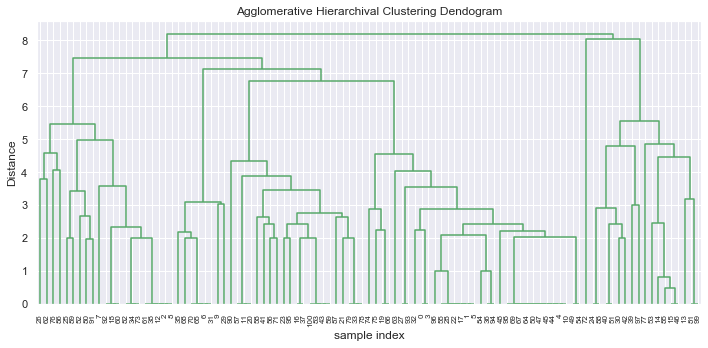

In [38]:
plt.title("Agglomerative Hierarchival Clustering Dendogram")
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=40, leaf_font_size=8.)
plt.tight_layout()